# Assignment 4

### 1. 复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

### 2. 回答一下理论题目

#### 1. What does a neuron compute?

数据\*权重，再经过激活函数后的值

####  2. Why we use non-linear activation funcitons in neural networks?

如果使用线性方程来作激活函数，在这种情况下你每一层输出都是上层输入的线性函数，很容易验证，无论你神经网络有多少层，输出都是输入的线性组合，与没有隐藏层效果相当，这种情况就是最原始的感知机（Perceptron）了。

#### 3. What is the 'Logistic Loss' ?

$$L(a^{(i)},y^{(i)}) = -y^{(i)} log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})$$

训练集的总loss:
$$ J = \frac{1}{m}\sum_{i=1}^{m}L(a^{(i)},y^{(i)}) $$

#### 4. Assume that you are building a binary classifier for detecting if an image containing cats, which activation functions would you recommen using for the output layer ?

A. ReLU    
B. Leaky ReLU    
C. sigmoid    
D. tanh  

会选择ReLU  function，因为经过ReLU  function计算后，y的值介于0——1之间，适合于二分类问题；此外，当x趋于正无穷或负无穷时，ReLU  function比sigmoid 的梯度变化要快

#### 5. Why we don't use zero initialization for all parameters ?

如果$w$全部初始化为0，那么所有的神经元将会有同样的input 和 output

#### 6. Can you implement the softmax function using python ? 

In [88]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

### 3.实践题

#### In this practical part, you will build a simple digits recognizer to check if the digit in the image is larger than 5. This assignmnet will guide you step by step to finish your first small project in this course .

#### 1 - Packages  
sklearn is a famous package for machine learning.   
matplotlib is a common package for vasualization.

In [4]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### 2 - Overvie of the dataset  
    - a training set has m_train images labeled as 0 if the digit < 5 or 1 if the digit >= 5
    - a test set contains m_test images labels as if the digit < 5 or 1 if the digit >= 5
    - eah image if of shape (num_px, num_px ). Thus, each image is square(height=num_px and  width = num_px)

In [5]:
# Loading the data 
digits = datasets.load_digits()

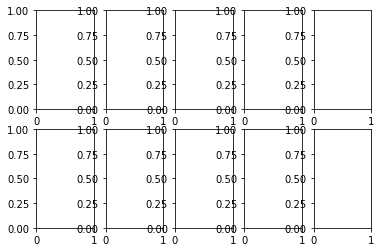

In [6]:
for i in range(1,11):
    plt.subplot(2,5,i) # subplot(2,3,i)是指一个2行3列的图中从左到右从上到下的第i个位置
    #plt.imshow(digits.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)
    #plt.text(3,10,str(digits.target[i-1]))
    #plt.xticks([])
    #plt.yticks([])
plt.show()

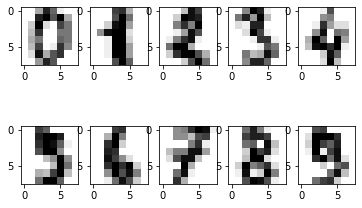

In [7]:
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(digits.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)
    #plt.text(3,10,str(digits.target[i-1]))
    #plt.xticks([])
    #plt.yticks([])
plt.show()

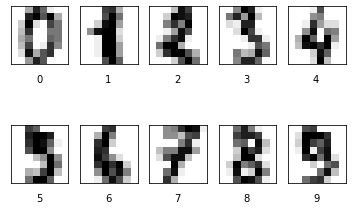

In [8]:
# Vilizating the data
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(digits.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)
    plt.text(3,10,str(digits.target[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [9]:
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [10]:
# reformulate the label. 
# If the digit is smaller than 5, the label is 0.
# If the digit is larger than 5, the label is 1.

y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347, 1)
(450, 1)


#### 3- Architecture of the neural network

![title](./networks.png)

In [12]:
!pwd

'pwd' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


##### Mathematical expression of the algorithm:

For one example $x^{(i)}$:   
 $$ z^{(i)} = w^T * x^{(i)} +b $$   
 $$ y^{(i)} = a^{(i)} = sigmoid(z^{(i)}) = \frac{1}{1+e^{-z^{(i)}}}$$   
 $$L(a^{(i)},y^{(i)}) = -y^{(i)} log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})$$

The total cost over all training examples:
$$ J = \frac{1}{m}\sum_{i=1}^{m}L(a^{(i)},y^{(i)}) $$

#### 4 - Building the algorithm

##### 4.1- Activation function    
###### **Exercise:**
**Finish the sigmoid funciton**

In [13]:
import math
import numpy as np

In [14]:
def sigmoid(z):
    '''
    Compute the sigmoid of z
    Arguments: z -- a scalar or numpy array of any size.
    
    Return:
    s -- sigmoid(z)
    '''
    s = 1 / (1+np.exp(-z))   # 对array使用指数函数要用到numpy的exp()函数
    
    return s

In [15]:
# Test your code 
# The result should be [0.5 0.88079708]
print("sigmoid([0,2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0,2]) = [0.5        0.88079708]


##### **4.1-Initializaing parameters**
###### **Exercise:**
**Finishe the initialize_parameters function below**

In [16]:
# Random innitialize the parameters

def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initializaed scalar
    '''
    
    w = np.random.randn(dim, 1)
    b = 0
    
    assert(w.shape == (dim,1)) # assert()：断言函数，如果不满足（），则出error
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

#### 4.3-Forward and backward propagation

###### Some mathematical expressions
Forward Propagation:   
. X    
. A = $\sigma(w^T*X+b) = (a^{(1)},a^{(2)},...,a^{(m)}$   
. J = $-\frac{1}{m} \sum_{i=1}^{m}y^{(i)}log(a^{(i)})+(1-y^{(i)})log(1-a^{(i)})$ 

$J=-sum(Ylog(A)+(1-Y)log(1-A))/m$

Some derivative: 
$$\frac{\partial{J}}{\partial{w}} = \frac{1}{m}X*(A-Y)^T$$  
$$\frac{\partial{J}}{\partial{w_j}} = \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)})*x^{(i)}_j$$
$$\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)}) $$

###### **Exercise:**
**Finish the function below:**

In [84]:
def propagate(w,b,X,Y):
    '''
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    '''
    #print(X.shape)
    m = X.shape[0]
    #print(m)
    n = X.shape[1]
    A = sigmoid(np.dot(X,w)+b)
    #print(Y*np.log(A))
    #print((1-Y)*np.log(1-A))
    #print(Y*np.log(A)+(1-Y)*np.log(1-A))
    #print((Y*np.log(A)+(1-Y)*np.log(1-A)).shape)
    print("np.sum",np.sum(Y*np.log(A)+(1-Y)*np.log(1-A)))
    cost = -1*sum(Y*np.log(A)+(1-Y)*np.log(1-A)) / m
    #print("A和Y",A.shape,Y.shape)
    #print((A-Y).shape)
    dw = np.zeros((n,1))
    for i in range(n):
        x_j = X[:,i].reshape(-1,1)
        #print(x_j.shape,(A-Y).shape)
        #print((x_j*(A-Y)).shape)
        dw[i] = sum(x_j*(A-Y))/m
    db = np.sum(A-Y)/m
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw':dw,
             'db':db}
    return grads, cost

##### 4.4 -Optimization

###### **Exercise:**
**Minimizing the cost function using gradient descent.   
$$\theta = \theta - \alpha*d\theta$$ where $\alpha$ is the learning rate.**

In [86]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    '''
    This function optimize w and b by running a gradient descen algorithm
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''
    x_train = X
    y_train = Y
    costs = []
    
    for i in range(num_iterations):
        
        grads_iteration, cost_iteration = propagate(w,b,x_train,y_train)
        print("cost：",cost_iteration)
        
        dw = grads_iteration['dw']
        db = grads_iteration['db']
        print("dw:",dw)
        w = w-learning_rate*dw
        b = b-learning_rate*db
        
        #if i % 100 == 0:
            #costs.append(cost)
        costs.append(cost_iteration)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    print(costs[-1])
    return params, grads, costs

###### **Exercise**
**The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function.    
Two steps to finish this task:**  
1. Calculate $\hat{Y} = A = \sigma(w^T*X+b)$   
2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [25]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias 
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[0]
    Y_prediction = np.zeros((m,1))
    w = w.reshape(-1,1)
    
    A = sigmoid(np.dot(X,w)+b)  # 矩阵相乘
    
    for i in range(A.shape[0]):
        if A[i]>0.5:
            Y_prediction[i] = 1
        else:
            Y_prediction[i] = 0
    
    assert(Y_prediction.shape == (m,1))
    
    return Y_prediction

##### 5- Merge all functions into a model

Congratulations !! You have finished all the necessary components for constructing a model. Now, Let's take the challenge to merge all the implemented function into one model.

In [27]:
def calculate_precision(y_hat, Y):
    """
    calculate the percent of y_hat which equals y
    Arguments:
    y_hat - a numpy array (vector) containing all predictions (0/1)
    Y - ground truth
    
    Returns:
    precision - a scaller
    
    """
    m = y_hat.shape[0]
    num_correct = 0
    for i in range(m):
        if y_hat[i] == Y[i]:   
            num_correct = num_correct + 1
    
    precision = num_correct / m
    
    return precision

In [42]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate,print_cost):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set
    Y_train - training label
    X_test - test set
    Y_test - test label
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "cost":cost}
    """
    d = {}
    
    # number of neurals in hidden layer
    dim = X_train.shape[1]
    # initialize_parameters
    initial_w,initial_b = initialize_parameters(dim)
    # train model
    best_parm ,best_grad, cost_list = optimize(initial_w, initial_b, X_train, Y_train, num_iterations, learning_rate, print_cost=False)
    best_w = best_parm['w']
    best_b = best_parm['b']
    d['w'] = best_w
    d['b'] = best_b
    d['cost'] = cost_list
    # predict
    y_hat_train = predict(best_w, best_b, X_train)
    y_hat_test = predict(best_w, best_b, X_test)
    
    # calculate training_accuracy & test_accuracy
    d['training_accuracy'] = calculate_precision(y_hat_train, Y_train)
    d['test_accuracy'] = calculate_precision(y_hat_test, Y_test)
    
    return d 

##### **feed model and get result**

In [52]:
# feed model and get result
learning_rate = math.exp(-2)

In [87]:
result = model(X_train, y_train, X_test, y_test, 3, learning_rate,'False')
result["training_accuracy"]

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in multiply
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in multiply


np.sum nan
cost： nan
dw: [[ 0.00000000e+00]
 [ 1.50285926e-01]
 [ 1.95171595e+00]
 [ 3.74284880e+00]
 [ 3.16484597e+00]
 [ 7.59250218e-01]
 [-7.65054910e-02]
 [-9.75481812e-03]
 [ 2.22717149e-03]
 [ 9.11233366e-01]
 [ 2.98327826e+00]
 [ 3.76601455e+00]
 [ 3.96869683e+00]
 [ 2.25696850e+00]
 [ 4.90337427e-02]
 [ 9.72900814e-03]
 [ 2.22717149e-03]
 [ 8.11173105e-01]
 [ 2.27955474e+00]
 [ 2.62745435e+00]
 [ 3.84343348e+00]
 [ 2.38554792e+00]
 [ 1.84415849e-01]
 [ 2.42685327e-02]
 [ 7.42390497e-04]
 [ 6.26269625e-01]
 [ 1.63429820e+00]
 [ 2.45544825e+00]
 [ 3.74457972e+00]
 [ 1.69805278e+00]
 [ 3.60923428e-01]
 [ 2.22672028e-03]
 [ 0.00000000e+00]
 [ 5.93045082e-01]
 [ 1.23307264e+00]
 [ 2.16903622e+00]
 [ 3.35837376e+00]
 [ 2.07493936e+00]
 [ 5.48793412e-01]
 [ 0.00000000e+00]
 [ 5.19673306e-03]
 [ 4.84575931e-01]
 [ 1.41547086e+00]
 [ 2.28138426e+00]
 [ 2.91026031e+00]
 [ 2.14675242e+00]
 [ 6.79308796e-01]
 [-1.34184854e-03]
 [ 7.42390497e-04]
 [ 2.85827768e-01]
 [ 2.16437579e+00]
 [ 3.1

0.4884929472902747

In [71]:
result["test_accuracy"]

0.4622222222222222

In [50]:
result["cost"]

[array(nan)]

### 4.选做题

Congratulations on building your first logistic regression model. It is your time to analyze it further.

##### 4.1 Observe the effect of learning rate on the leraning process.   
Hits: plot the learning curve with different learning rate

##### 4.2 Observe the effect of iteration_num on the test accuracy.

# Challenge ! ! !

The original data have images labeled 0,1,2,3,4,5,6,7,8,9. In our logistic model, we only detect if the digit in the image is larger or smaller than 5. Now, Let's go for a more challenging problem. Try to use softmax function to build a model to recognize which digit (0,1,2,3,4,5,6,7,8,9) is in the image.

# Congratulations ! You have completed assigment 4. 